In [88]:
#import
import pandas as pd
import numpy as np
import scipy.io as sio
import os
import h5py
from datetime import *
%matplotlib inline
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
myfont = FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf', size=10)
sns.set(font=myfont.get_name(),style="whitegrid",palette="muted",color_codes=True)
import warnings
warnings.filterwarnings("ignore")
from statsmodels.regression.linear_model import OLS
import random
from scipy import stats
from scipy.optimize import least_squares
import copy
import math
from sklearn.neighbors import KernelDensity
import scipy.stats
import statsmodels as sm
import QuantLib as ql

In [2]:
#full_data
os.chdir(r'C:/Users/bj/Desktop/刘泽丹/Code/')
full = pd.read_csv('full_data_for_generator_from_db.csv')
full.columns = [int(i) for i in full.columns]
full[4] = [int(str(date.fromordinal(i-366)).replace('-','')) for i in full[4]]
full.set_index([0,4],inplace=True)
full_nonright = pd.read_csv('full_data_for_mission.csv')
full_nonright.columns = [int(i) for i in full_nonright.columns]
full_nonright[4] = [int(str(date.fromordinal(int(i)-366)).replace('-','')) for i in full_nonright[4]]
full_nonright.set_index([0,4],inplace = True)
return_info = pd.read_csv('full_data.csv')
return_info.set_index(['S_INFO_WINDCODE','TRADE_DT'],inplace=True)

In [3]:
def how_many_week_date_between(now_date,future_date):
    flag = 0
    if now_date > future_date:
        flag = 1
        now_date,future_date = future_date,now_date
    year = int(now_date[:4])
    month = int(now_date[4:6])
    day = int(now_date[6:])
    now = date(year,month,day)
    year = int(future_date[:4])
    month = int(future_date[4:6])
    day = int(future_date[6:])
    future = date(year,month,day)
    days = 0
    while(now<future):
        now = now + timedelta(days=1)
        if now.isoweekday() == 6 or now.isoweekday() == 7:
            pass
        elif now == date(2018,1,1) or now == date(2018,2,15) or now == date(2018,2,16) or now == date(2018,2,19)\
            or now == date(2018,2,20) or now == date(2018,2,21) or now == date(2018,4,5) or now == date(2018,4,6)\
            or now == date(2018,4,30) or now == date(2018,5,1) or now == date(2018,6,18) or now == date(2018,9,24)\
            or now == date(2018,10,1) or now == date(2018,10,2) or now == date(2018,10,3) or now == date(2018,10,4)\
            or now == date(2018,10,5) or now == date(2018,12,31) or now == date(2019,1,1) or now == date(2019,2,4)\
            or now == date(2019,2,5) or now == date(2019,2,6) or now == date(2019,2,7) or now == date(2019,2,8)\
            or now == date(2019,2,9) or now == date(2019,2,10) or now == date(2019,4,5) or now == date(2019,5,1)\
            or now == date(2019,6,7) or now == date(2019,9,13) or now == date(2019,10,1) or now == date(2019,10,2)\
            or now == date(2019,10,3) or now == date(2019,10,4) or now == date(2019,10,5) or now == date(2019,10,6)\
            or now == date(2019,10,7):
            pass
        else:
            days += 1
    if flag == 1:
        days = -days
    return days
def get_n_week_date_before(now_date,days=1):
    year = int(now_date[:4])
    month = int(now_date[4:6])
    day = int(now_date[6:])
    today = date(year,month,day)
    while(days>0):
        today = today - timedelta(days=1)
        if today.isoweekday() == 6 or today.isoweekday() == 7:
            pass
        elif today == date(2018,1,1) or today == date(2018,2,15) or today == date(2018,2,16) or today == date(2018,2,19)\
            or today == date(2018,2,20) or today == date(2018,2,21) or today == date(2018,4,5) or today == date(2018,4,6)\
            or today == date(2018,4,30) or today == date(2018,5,1) or today == date(2018,6,18) or today == date(2018,9,24)\
            or today == date(2018,10,1) or today == date(2018,10,2) or today == date(2018,10,3) or today == date(2018,10,4)\
            or today == date(2018,10,5) or today == date(2018,12,31) or today == date(2019,1,1) or today == date(2019,2,4)\
            or today == date(2019,2,5) or today == date(2019,2,6) or today == date(2019,2,7) or today == date(2019,2,8)\
            or today == date(2019,2,9) or today == date(2019,2,10) or today == date(2019,4,5) or today == date(2019,5,1)\
            or today == date(2019,6,7) or today == date(2019,9,13) or today == date(2019,10,1) or today == date(2019,10,2)\
            or today == date(2019,10,3) or today == date(2019,10,4) or today == date(2019,10,5) or today == date(2019,10,6)\
            or today == date(2019,10,7):
            pass
        else:
            days -= 1
    year = str(today.year)
    if today.month < 10:
        month = '0' + str(today.month)
    else:
        month = str(today.month)
    if today.day < 10:
        day = '0' + str(today.day)
    else:
        day = str(today.day)
    return year + month + day
def get_n_week_date_after(now_date,days=1):
    year = int(now_date[:4])
    month = int(now_date[4:6])
    day = int(now_date[6:])
    today = date(year,month,day)
    while(days>0):
        today = today + timedelta(days=1)
        if today.isoweekday() == 6 or today.isoweekday() == 7:
            pass
        elif today == date(2018,1,1) or today == date(2018,2,15) or today == date(2018,2,16) or today == date(2018,2,19)\
            or today == date(2018,2,20) or today == date(2018,2,21) or today == date(2018,4,5) or today == date(2018,4,6)\
            or today == date(2018,4,30) or today == date(2018,5,1) or today == date(2018,6,18) or today == date(2018,9,24)\
            or today == date(2018,10,1) or today == date(2018,10,2) or today == date(2018,10,3) or today == date(2018,10,4)\
            or today == date(2018,10,5) or today == date(2018,12,31) or today == date(2019,1,1) or today == date(2019,2,4)\
            or today == date(2019,2,5) or today == date(2019,2,6) or today == date(2019,2,7) or today == date(2019,2,8)\
            or today == date(2019,2,9) or today == date(2019,2,10) or today == date(2019,4,5) or today == date(2019,5,1)\
            or today == date(2019,6,7) or today == date(2019,9,13) or today == date(2019,10,1) or today == date(2019,10,2)\
            or today == date(2019,10,3) or today == date(2019,10,4) or today == date(2019,10,5) or today == date(2019,10,6)\
            or today == date(2019,10,7):
            pass
        else:
            days -= 1
    year = str(today.year)
    if today.month < 10:
        month = '0' + str(today.month)
    else:
        month = str(today.month)
    if today.day < 10:
        day = '0' + str(today.day)
    else:
        day = str(today.day)
    return year + month + day

In [4]:
dividendyield = pd.read_csv('dividendyield2.csv',index_col = 0)
dividendyield.columns = [int(i) for i in dividendyield.columns]

In [5]:
from WindPy import *
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [6]:
first_date = '2017-01-02'
last_date = '2019-01-09'
todate = 20190102
annualize_factor = 250
profitreturn_factor = 0.4

In [ ]:
Rdata = w.edb("M0017138", first_date, last_date, "Fill=Previous")
R = pd.DataFrame(Rdata.Data[0], index=Rdata.Times, columns=['R'])['R']
R.index = [int(str(i).replace('-', '')) for i in R.index]
R.to_csv('Shibor_overnight.csv')

In [ ]:
data = w.wsd("000905.SH", "pct_chg", first_date, last_date, "PriceAdj=B")
zz500 = pd.DataFrame(data.Data[0], index=data.Times, columns=['zz500'])['zz500']
zz500.index = [int(str(i).replace('-', '')) for i in zz500.index]
zz500.to_csv('zz500.csv')

In [8]:
R = pd.read_csv('Shibor_overnight.csv',header=None,index_col=0)[1]
zz500 = pd.read_csv('zz500.csv', index_col=0, header=None)[1]

In [9]:
R = R[R.index<=todate]
zz500 = zz500[zz500.index<=todate]

In [10]:
options_record = pd.read_excel('options_record_sub.xlsx',index_col = 0)

In [11]:
def get_history_volatility(stock, check_date, window = 20):
    sub = full.xs(stock,level = 0)[8]
    pct_chg = (sub/sub.shift(1) - 1)
    pct_chg = pct_chg[pct_chg.index <= check_date].iloc[-window:]
    return pct_chg.std() * np.sqrt(annualize_factor)
def get_dividendyield(stock, check_date):
    return dividendyield.loc[check_date,stock]/100
def get_history_ShiborON(check_date):
    return R.loc[check_date]/100

In [12]:
def European_option(type_of_option, S_0, K, sigma, q, r, T, percent = False):
    d_1 = (np.log(S_0/K) + (r - q + (sigma ** 2)/2) * T) / (sigma * np.sqrt(T))
    d_2 = (np.log(S_0/K) + (r - q - (sigma ** 2)/2) * T) / (sigma * np.sqrt(T))
    percent = (S_0 if percent else 1)
    if type_of_option == 'call':
        price = (S_0 * np.exp( -q * T) * stats.norm.cdf(d_1) - K * np.exp( -r * T) * stats.norm.cdf(d_2))/percent
        delta = np.exp( -q * T) * stats.norm.cdf(d_1)
        gamma = (stats.norm.pdf(d_1) * np.exp( -q * T)) / (S_0 * sigma * np.sqrt(T))
        vega = S_0 * np.sqrt(T) * stats.norm.pdf(d_1) * np.exp( -q * T) /100
        theta = ((-S_0 * stats.norm.pdf(d_1) * sigma * np.exp( -q * T)) / (2 * np.sqrt(T)) +\
                     q * S_0 * stats.norm.cdf(d_1) * np.exp( -q * T) - r * K * np.exp( -r * T) * stats.norm.cdf(d_2)) / 365
        rho = K * T * np.exp( -r * T) * stats.norm.cdf(d_2) /100
    elif type_of_option == 'put':
        price = (K * np.exp( -r * T) * stats.norm.cdf( -d_2) - S_0 * np.exp( -q * T) * stats.norm.cdf( -d_1))/percent
        delta = np.exp( -q * T) * (stats.norm.cdf(d_1) - 1)
        gamma = (stats.norm.pdf(d_1) * np.exp( -q * T)) / (S_0 * sigma * np.sqrt(T))
        vega = S_0 * np.sqrt(T) * stats.norm.pdf(d_1) * np.exp( -q * T) /100
        theta = ((-S_0 * stats.norm.pdf( -d_1) * sigma * np.exp( -q * T)) / (2 * np.sqrt(T)) -\
                     q * S_0 * stats.norm.cdf( -d_1) * np.exp( -q * T) + r * K * np.exp( -r * T) * stats.norm.cdf( -d_2)) / 365
        rho = -K * T * np.exp( -r * T) * stats.norm.cdf( -d_2) /100
    result = {'price':price, 'delta':delta, 'gamma':gamma, 'vega':vega, 'theta':theta, 'rho':rho}
    return result

In [13]:
def implied_volatility(known_price, type_of_option, S_0, K, q, r, T, percent = False):
    ori_low = 0.05
    ori_high = 3
    while(True):
        volatility_cycle = np.linspace(ori_low,ori_high,10)
        step = volatility_cycle[1] - volatility_cycle[0]
        best_diff = np.inf
        for volatility in volatility_cycle:
            price_diff = np.abs(European_option(type_of_option, S_0, K, volatility, q, r, T, percent)['price'] - known_price)
            if price_diff < best_diff:
                best_diff = price_diff
                new_low = max(ori_low,volatility - step)
                new_high = min(ori_high,volatility + step)
            if price_diff < 1e-10:
                return {'know_price':known_price,'type_of_option':type_of_option,'implied_volatility':(new_low+new_high)/2}
        ori_low = new_low
        ori_high = new_high

In [599]:
def implied_drift(known_price, type_of_option, S_0, K, sigma, q, T, percent = False):
    ori_low = 0.05
    ori_high = 3
    while(True):
        r_cycle = np.linspace(ori_low,ori_high,10)
        step = r_cycle[1] - r_cycle[0]
        best_diff = np.inf
        for r in r_cycle:
            price_diff = np.abs(European_option(type_of_option, S_0, K, sigma, q, r, T, percent)['price'] - known_price)
            if price_diff < best_diff:
                best_diff = price_diff
                new_low = max(ori_low,r - step)
                new_high = min(ori_high,r + step)
            if price_diff < 1e-10:
                return {'know_price':known_price,'type_of_option':type_of_option,'implied_r':(new_low+new_high)/2}
        ori_low = new_low
        ori_high = new_high

In [14]:
pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',None)

In [15]:
options_record_extend = pd.DataFrame()
for i in options_record.index:
    stock = options_record.xs(i)['股票代码']
    stock_sec_name = options_record.xs(i)['股票名称']
    start_date = options_record.xs(i)['下单日期']
    end_date = options_record.xs(i)['到期日期']
    total_cost = options_record.xs(i)['实际权利金']
    S_0 = options_record.xs(i)['期初价格']
    K_ATM = S_0
    K_101 = options_record.xs(i)['行权价（南华）']
    if pd.notnull(options_record.xs(i)['结算价']):
        S_1 = options_record.xs(i)['结算价']
    elif end_date <= todate:
        S_1 = full_nonright.xs((stock,end_date))[8]
    else:
        S_1 = full_nonright.xs((stock,todate))[8]
    known_ATM_price = options_record.xs(i)['含0.2%通道费（平值100%）']
    #special
    if i == 15:
        known_ATM_price_wo_transcost = known_ATM_price - 0.001
    else:
        known_ATM_price_wo_transcost = known_ATM_price - 0.002
    known_101_price = options_record.xs(i)['期权费率（虚值101%）']
    location = ('平' if 1 < S_1/S_0 < 1+known_ATM_price else ('虚' if S_1/S_0 <= 1 else '实'))

    holding_period = how_many_week_date_between(str(start_date),str(end_date)) / annualize_factor
    principle = options_record.xs(i)['名义本金']
    implied_ATM_volatility = implied_volatility(known_ATM_price_wo_transcost,'call',S_0,K_ATM,\
                                                get_dividendyield(stock, start_date),get_history_ShiborON(start_date),holding_period,True)['implied_volatility']
    implied_101_volatility = implied_volatility(known_101_price,'call',S_0,K_101,\
                                                get_dividendyield(stock, start_date),get_history_ShiborON(start_date),holding_period,True)['implied_volatility']
    history_volatility_5 = get_history_volatility(stock, start_date, 5)
    history_volatility_20 = get_history_volatility(stock, start_date, 20)
    history_volatility_30 = get_history_volatility(stock, start_date, 30)
    history_volatility_60 = get_history_volatility(stock, start_date, 60)
    holding_period_volatility = get_history_volatility(stock, min(end_date,todate), how_many_week_date_between(str(start_date),str(min(end_date,todate)))+1)
    ATM_option_result = European_option('call',S_0,K_ATM,implied_ATM_volatility,\
                                        get_dividendyield(stock, start_date),get_history_ShiborON(start_date),holding_period, True)
    price = ATM_option_result['price']; delta = ATM_option_result['delta']; gamma = ATM_option_result['gamma']
    vega = ATM_option_result['vega']; theta = ATM_option_result['theta']; rho = ATM_option_result['rho']
    theory_price = European_option('call',S_0,K_ATM,history_volatility_30,\
                                        get_dividendyield(stock, start_date),get_history_ShiborON(start_date),holding_period, True)['price']
    single_options_record_extend = pd.Series([S_1,location,known_ATM_price_wo_transcost,\
                            holding_period,get_dividendyield(stock, start_date),get_history_ShiborON(start_date),\
                            implied_ATM_volatility,implied_101_volatility,holding_period_volatility,history_volatility_5,\
                            history_volatility_20,history_volatility_30,history_volatility_60,theory_price,delta,gamma,vega,theta,rho],\
                            index = ['当前价格','区间','ATM费率','年化期限','股息率','无风险利率','ATM隐含波动率','101隐含波动率','持有期波动率',\
                            '5日波动率','20日波动率','30日波动率','60日波动率','理论价格','Delta','Gamma','Vega','Theta','Rho'],name = i)
    options_record_extend = pd.concat([options_record_extend,single_options_record_extend],axis=1)
options_record_extend = options_record_extend.T.loc[:,['当前价格','区间','ATM费率','年化期限','股息率','无风险利率','ATM隐含波动率','101隐含波动率','持有期波动率',\
                            '5日波动率','20日波动率','30日波动率','60日波动率','理论价格','Delta','Gamma','Vega','Theta','Rho']]

In [16]:
options_record_extend = pd.concat([options_record,options_record_extend],axis=1)

In [17]:
options_record_extend.to_excel('options_record_extend.xlsx')

In [18]:
options_record_extend

,股票名称,股票代码,下单日期,到期日期,期限,名义本金,含0.2%通道费（平值100%）,实际权利金,期权费率（虚值101%）,虚值权利金,期初价格,行权价（南华）,保证金,结算价,到期期权价格,返款,利润,当前价格,区间,ATM费率,年化期限,股息率,无风险利率,ATM隐含波动率,101隐含波动率,持有期波动率,5日波动率,20日波动率,30日波动率,60日波动率,理论价格,Delta,Gamma,Vega,Theta,Rho
序号,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,外运发展,600270,20181105,20181204,1月,500000,0.0376,18800.0,0.0326,16300.0,21.37,21.580,75000,22.450,0.04071,20355.0,-4055.0,22.45,实,0.0356,0.084,0.028103,0.024345,0.31004,0.323084,0.23668,0.284651,0.262507,0.257017,0.241827,0.0294879,0.5153,0.207086,0.0246296,-0.0122888,0.008611
2,世联行,2285,20181115,20181128,2周,600000,0.0614,36840.0,0.0544,32640.0,5.22,5.272,90000,5.372,0.01916,11496.0,21144.0,5.372,平,0.0594,0.036,0.0153627,0.02339,0.784099,0.778247,0.459548,0.309527,0.423345,0.595524,0.490349,0.0451668,0.530128,0.511932,0.00393755,-0.0117892,0.000884592
3,东方集团,600811,20181115,20181214,1月,500000,0.0524,26200.0,0.0454,22700.0,4.12,4.161,75000,3.700,0.00000,0.0,22700.0,3.7,虚,0.0504,0.084,0.00510949,0.02339,0.430021,0.426653,0.244235,0.295593,0.253413,0.244401,0.252727,0.0289925,0.529521,0.774439,0.00474844,-0.00342591,0.00165814
4,东方集团,600811,20181115,20181214,1月,500000,0.0524,26200.0,0.0454,22700.0,4.12,4.161,75000,3.700,0.00000,0.0,22700.0,3.7,虚,0.0504,0.084,0.00510949,0.02339,0.430021,0.426653,0.244235,0.295593,0.253413,0.244401,0.252727,0.0289925,0.529521,0.774439,0.00474844,-0.00342591,0.00165814
5,马应龙,600993,20181116,20181129,2周,500000,0.0506,25300.0,0.0436,21800.0,14.50,14.645,75000,13.160,0.00000,0.0,21800.0,13.16,虚,0.0486,0.036,0.0157967,0.02345,0.641086,0.635796,0.339776,0.238267,0.330981,0.39637,0.304017,0.0301125,0.524852,0.225613,0.0109476,-0.0268203,0.00248603
6,兴业银行,601166,20181116,20181129,2周,500000,0.0404,20200.0,0.0334,16700.0,15.84,15.998,75000,15.720,0.00000,0.0,16700.0,15.72,虚,0.0384,0.036,0.0410872,0.02345,0.51228,0.506469,0.139124,0.123091,0.231873,0.280362,0.238674,0.020879,0.516013,0.258505,0.0119616,-0.0228829,0.00272354
7,兴业银行,601166,20181116,20181129,2周,1200000,0.0404,48480.0,0.0334,40080.0,15.84,15.998,180000,15.720,0.00000,0.0,40080.0,15.72,虚,0.0384,0.036,0.0410872,0.02345,0.51228,0.506469,0.139124,0.123091,0.231873,0.280362,0.238674,0.020879,0.516013,0.258505,0.0119616,-0.0228829,0.00272354
10,深振业Ａ,6,20181116,20181129,2周,500000,0.0589,29450.0,0.0529,26450.0,5.51,5.565,75000,5.360,0.00000,0.0,26450.0,5.36,虚,0.0569,0.036,0.0327899,0.02345,0.755337,0.762679,0.501625,0.239871,0.277214,0.480799,0.483166,0.0361765,0.527007,0.503397,0.00415582,-0.0118502,0.000932504
11,中国核电,601985,20181116,20181129,2周,500000,0.0421,21050.0,0.0361,18050.0,5.59,5.646,75000,5.330,0.00000,0.0,18050.0,5.33,虚,0.0401,0.036,0.0200358,0.02345,0.52959,0.537682,0.178651,0.0974172,0.233864,0.290584,0.240288,0.0220369,0.520147,0.708792,0.00422265,-0.0085222,0.000966047


In [96]:
options_record_start_date = options_record['下单日期'].min()
options_record_date = zz500[zz500.index>=options_record_start_date].index.tolist()
full_options_record_extend = {}
for record_date in options_record_date:
    sub_options_record = options_record[(options_record['下单日期']<=record_date) & (options_record['到期日期']>=record_date)]
    sub_options_record_extend = pd.DataFrame()
    for i in sub_options_record.index:
        stock = sub_options_record.xs(i)['股票代码']
        stock_sec_name = sub_options_record.xs(i)['股票名称']
        start_date = sub_options_record.xs(i)['下单日期']
        end_date = sub_options_record.xs(i)['到期日期']
        total_cost = sub_options_record.xs(i)['实际权利金']
        S_0 = sub_options_record.xs(i)['期初价格']
        K_ATM = S_0
        K_101 = sub_options_record.xs(i)['行权价（南华）']
        if pd.notnull(sub_options_record.xs(i)['结算价']) and end_date == record_date:
            S_1 = sub_options_record.xs(i)['结算价']
        elif end_date <= record_date:
            S_1 = full_nonright.xs((stock,end_date))[8]
        else:
            S_1 = full_nonright.xs((stock,record_date))[8]
        known_ATM_price = sub_options_record.xs(i)['含0.2%通道费（平值100%）']
        #special
        if i == 15:
            known_ATM_price_wo_transcost = known_ATM_price - 0.001
        else:
            known_ATM_price_wo_transcost = known_ATM_price - 0.002
        known_101_price = sub_options_record.xs(i)['期权费率（虚值101%）']
        location = ('平' if 1 < S_1/S_0 < 1+known_ATM_price else ('虚' if S_1/S_0 <= 1 else '实'))

        holding_period = how_many_week_date_between(str(start_date),str(end_date)) / annualize_factor
        remaining_period_day = how_many_week_date_between(str(record_date),str(end_date))
        remaining_period = how_many_week_date_between(str(record_date),str(end_date)) / annualize_factor
        principle = sub_options_record.xs(i)['名义本金']
        implied_ATM_volatility = implied_volatility(known_ATM_price_wo_transcost,'call',S_0,K_ATM,\
                                                    get_dividendyield(stock, start_date),get_history_ShiborON(start_date),holding_period,True)['implied_volatility']
        implied_101_volatility = implied_volatility(known_101_price,'call',S_0,K_101,\
                                                    get_dividendyield(stock, start_date),get_history_ShiborON(start_date),holding_period,True)['implied_volatility']
        history_volatility_5 = get_history_volatility(stock, start_date, 5)
        history_volatility_20 = get_history_volatility(stock, start_date, 20)
        history_volatility_30 = get_history_volatility(stock, start_date, 30)
        history_volatility_60 = get_history_volatility(stock, start_date, 60)
        ATM_option_result = European_option('call',S_1,K_ATM,implied_ATM_volatility,\
                                            get_dividendyield(stock, record_date),get_history_ShiborON(record_date),remaining_period, True)
        price = ATM_option_result['price']; delta = ATM_option_result['delta']; gamma = ATM_option_result['gamma']
        vega = ATM_option_result['vega']; theta = ATM_option_result['theta']; rho = ATM_option_result['rho']
        single_sub_options_record_extend = pd.Series([stock,stock_sec_name,S_0,S_1,K_101,location,total_cost,known_ATM_price_wo_transcost,known_101_price,\
                                start_date,end_date,holding_period,remaining_period_day,principle,get_dividendyield(stock, start_date),get_history_ShiborON(start_date),\
                                implied_ATM_volatility,\
                                implied_101_volatility,history_volatility_5,history_volatility_20,history_volatility_30,history_volatility_60,price,delta,gamma,vega,theta,rho],\
                                index = ['股票代码','股票名称','期初价','当前价格','101行权价','区间','成本','ATM费率','101费率','下单日期','到期日期','年化期限','剩余期限','本金','股息率',\
                                '无风险利率','ATM隐含波动率','101隐含波动率','5日波动率','20日波动率','30日波动率','60日波动率','AMT价格','Delta','Gamma','Vega','Theta','Rho'],\
                                name = i)
        sub_options_record_extend = pd.concat([sub_options_record_extend,single_sub_options_record_extend],axis=1)
    sub_options_record_extend = sub_options_record_extend.T.loc[:,['股票代码','股票名称','期初价','当前价格','101行权价','区间',\
                                '成本','ATM费率','101费率','下单日期','到期日期','年化期限','剩余期限','本金','股息率','无风险利率','ATM隐含波动率','101隐含波动率',\
                                '5日波动率','20日波动率','30日波动率','60日波动率','AMT价格','Delta','Gamma','Vega','Theta','Rho']]
    full_options_record_extend[record_date] = sub_options_record_extend
    print(record_date)

20181105
20181106
20181107
20181108
20181109
20181112
20181113
20181114
20181115
20181116
20181119
20181120
20181121
20181122
20181123
20181126
20181127
20181128
20181129
20181130
20181203
20181204
20181205
20181206
20181207
20181210
20181211
20181212
20181213
20181214
20181217
20181218
20181219
20181220
20181221
20181224
20181225
20181226
20181227
20181228
20190102


In [97]:
itm = []; atm = []; otm = []
itm_pct = []; atm_pct = []; otm_pct = []
active_contract = []
for key in full_options_record_extend.keys():
    active_contract.append(len(full_options_record_extend[key]))
    itm.append(full_options_record_extend[key]['区间'].value_counts(normalize = False)['实'] if '实' in full_options_record_extend[key]['区间'].tolist() else 0)
    atm.append(full_options_record_extend[key]['区间'].value_counts(normalize = False)['平'] if '平' in full_options_record_extend[key]['区间'].tolist() else 0)
    otm.append(full_options_record_extend[key]['区间'].value_counts(normalize = False)['虚'] if '虚' in full_options_record_extend[key]['区间'].tolist() else 0)
    itm_pct.append(full_options_record_extend[key]['区间'].value_counts(normalize = True)['实'] if '实' in full_options_record_extend[key]['区间'].tolist() else 0)
    atm_pct.append(full_options_record_extend[key]['区间'].value_counts(normalize = True)['平'] if '平' in full_options_record_extend[key]['区间'].tolist() else 0)
    otm_pct.append(full_options_record_extend[key]['区间'].value_counts(normalize = True)['虚'] if '虚' in full_options_record_extend[key]['区间'].tolist() else 0)

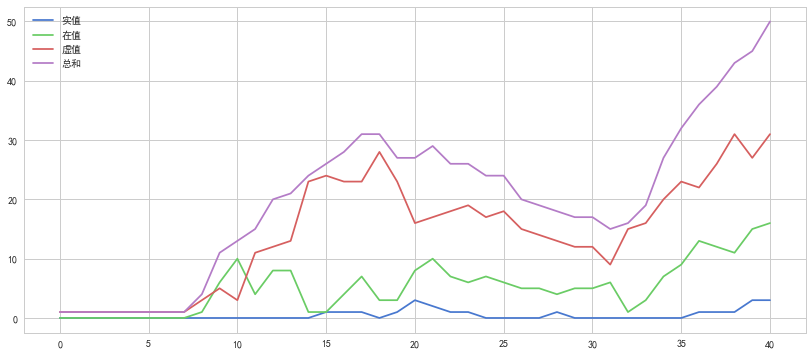

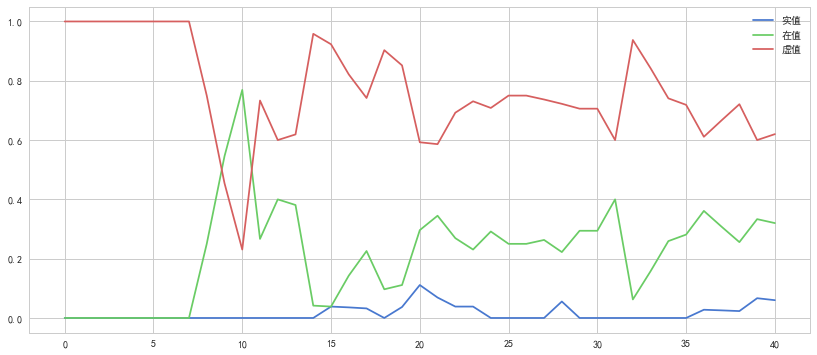

In [98]:
#plot
plt.figure(figsize=(14,6))
plt.plot(itm,label='实值')
plt.plot(atm,label='在值')
plt.plot(otm,label='虚值')
plt.plot(active_contract,label='总和')
plt.legend()
plt.show()
plt.figure(figsize=(14,6))
plt.plot(itm_pct,label='实值')
plt.plot(atm_pct,label='在值')
plt.plot(otm_pct,label='虚值')
plt.legend()
plt.show()

In [99]:
cash_acquiring = {}
cash_acquired = {}
full_total_cost = {}
for key in full_options_record_extend.keys():
    sub_options_record_extend = full_options_record_extend[key]
    full_total_cost[key] = sub_options_record_extend['成本'].sum()
    money_level_atm = (sub_options_record_extend.loc[:,['当前价格','101行权价']].min(axis=1) - sub_options_record_extend['期初价'])/\
        sub_options_record_extend['期初价'] * sub_options_record_extend['本金']
    money_level_atm.loc[money_level_atm<0] = 0
    money_level_101 = (sub_options_record_extend['当前价格'] - sub_options_record_extend['101行权价'])/\
        sub_options_record_extend['期初价'] * sub_options_record_extend['本金']
    money_level_101.loc[money_level_101<0] = 0
    seller_profit = sub_options_record_extend['本金'] * sub_options_record_extend['101费率'] - money_level_101
    seller_profit.loc[seller_profit<0] = 0
    seller_profit = seller_profit * profitreturn_factor
    cash_acquiring[key] = money_level_atm.sum() + money_level_101.sum() + seller_profit.sum()
    sub_sub_options_record_extend = sub_options_record_extend[sub_options_record_extend['到期日期'] == key]
    sub_money_level_atm = (sub_sub_options_record_extend.loc[:,['当前价格','101行权价']].min(axis=1) - sub_sub_options_record_extend['期初价'])/\
        sub_sub_options_record_extend['期初价'] * sub_sub_options_record_extend['本金']
    sub_money_level_atm.loc[sub_money_level_atm<0] = 0
    sub_money_level_101 = (sub_sub_options_record_extend['当前价格'] - sub_sub_options_record_extend['101行权价'])/\
        sub_sub_options_record_extend['期初价'] * sub_sub_options_record_extend['本金']
    sub_money_level_101.loc[sub_money_level_101<0] = 0
    sub_seller_profit = sub_sub_options_record_extend['本金'] * sub_sub_options_record_extend['101费率'] - sub_money_level_101
    sub_seller_profit.loc[sub_seller_profit<0] = 0
    sub_seller_profit = sub_seller_profit * profitreturn_factor
    cash_acquired[key] = sub_money_level_atm.sum() + sub_money_level_101.sum() + sub_seller_profit.sum()
full_total_cost = pd.DataFrame.from_dict(full_total_cost,orient='index')[0]
cash_acquiring = pd.DataFrame.from_dict(cash_acquiring,orient='index')[0]
cash_acquired = pd.DataFrame.from_dict(cash_acquired,orient='index')[0].replace(False,0)

In [100]:
options_record_start_date = options_record['下单日期'].min()
options_record_date = zz500[zz500.index>=options_record_start_date].index.tolist()
weighted_sum = []
for record_date in options_record_date:
    sub_options_record = options_record[(options_record['下单日期']<=record_date) & (options_record['到期日期']>=record_date)]
    weight = sub_options_record.groupby('股票代码').sum()['名义本金']/sub_options_record.groupby('股票代码').sum()['名义本金'].sum()
    return_record_date = return_info.xs(record_date,level='TRADE_DT').loc[weight.index]['cc']
    weighted_sum.append((return_record_date *weight).sum())
weighted_sum = pd.Series(weighted_sum, index = options_record_date)
sub_zz500 = zz500[zz500.index.isin(options_record_date)]

跟踪偏离度 -23.76 %
跟踪误差 9.31 %
方向相同概率 92.67999999999999 %


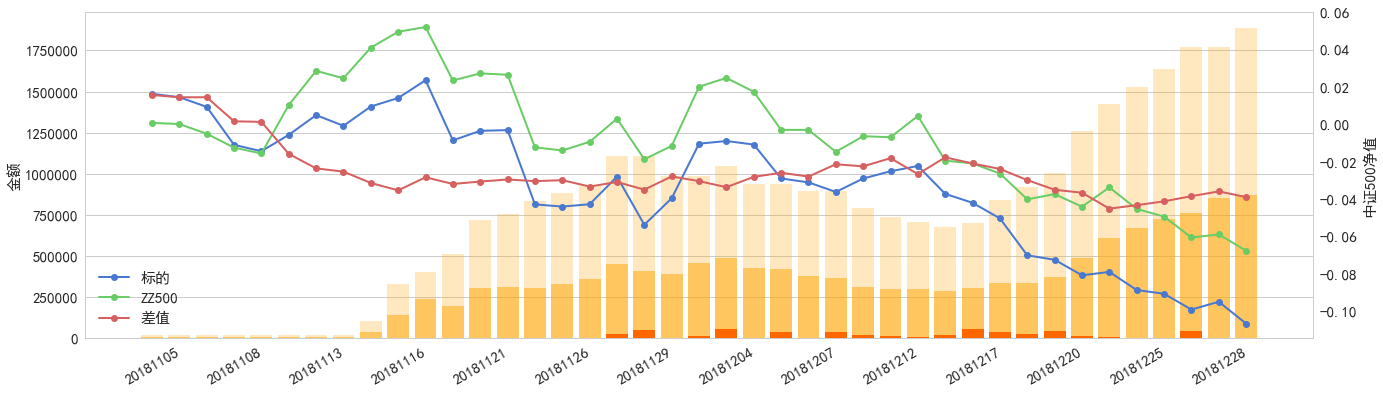

In [101]:
print('跟踪偏离度',round((weighted_sum/100 - sub_zz500/100).mean() * annualize_factor,4)*100,'%')
print('跟踪误差',round((weighted_sum/100 - sub_zz500/100).std() * np.sqrt(annualize_factor),4)*100,'%')
print('方向相同概率',round((np.sign(weighted_sum) == np.sign(sub_zz500)).sum()/len(weighted_sum),4)*100,'%')
n = len(options_record_date)
X = np.arange(n)
Xlabel = [index for index,value in enumerate(options_record_date) if index%3 == 0]
fig = plt.figure(figsize = (22,6))
ax1 = fig.add_subplot(111)
ax1.bar(range(len(cash_acquired)),(cash_acquired).tolist(),color = 'red',alpha = 1)
ax1.bar(range(len(cash_acquiring)),(cash_acquiring).tolist(),color = 'orange',alpha = 0.5)
ax1.bar(range(len(full_total_cost)),(full_total_cost).tolist(),color = 'orange',alpha = 0.25)
ax1.set_ylabel('金额',fontsize=15)
ax1.grid(axis='x')
plt.setp(plt.gca().get_yticklabels(),fontsize=15)
ax1.set_xticks(Xlabel)
ax1.set_xticklabels([value for index,value in enumerate(options_record_date) if index%3 == 0],fontsize=15)
plt.setp(plt.gca().get_xticklabels(),rotation=30)
ax2 = ax1.twinx()
ax2.plot((weighted_sum/100).cumsum().tolist(), marker = 'o',label = '标的',linewidth = 2)
ax2.plot((sub_zz500/100).cumsum().tolist(), marker = 'o',label = 'ZZ500',linewidth = 2)
ax2.plot(((weighted_sum - sub_zz500)/100).cumsum().tolist(), marker = 'o',label = '差值',linewidth = 2)
ax2.set_ylabel('中证500净值',fontsize=15)
ax2.grid(False)
plt.setp(plt.gca().get_yticklabels(),fontsize=15)
plt.legend(fontsize = 15,loc=3)
plt.show()

In [102]:
cash_acquired

20181105        0.000000
20181106        0.000000
20181107        0.000000
20181108        0.000000
20181109        0.000000
20181112        0.000000
20181113        0.000000
20181114        0.000000
20181115        0.000000
20181116        0.000000
20181119        0.000000
20181120        0.000000
20181121        0.000000
20181122        0.000000
20181123        0.000000
20181126        0.000000
20181127        0.000000
20181128    25929.563218
20181129    49232.000000
20181130        0.000000
20181203    12100.000000
20181204    55569.068788
20181205        0.000000
20181206    36239.128751
20181207        0.000000
20181210    37016.097768
20181211    19400.000000
20181212    12000.000000
20181213     9360.000000
20181214    18160.000000
20181217    58696.000000
20181218    38744.942166
20181219    26432.000000
20181220    44248.000000
20181221    13820.000000
20181224    11120.000000
20181225        0.000000
20181226        0.000000
20181227    43980.000000
20181228        0.000000


high = pd.read_csv('high.csv',index_col = 0)
high.columns = [int(i) for i in high.columns]
open_p = pd.read_csv('open.csv',index_col = 0)
open_p.columns = [int(i) for i in open_p.columns]
low = pd.read_csv('low.csv',index_col = 0)
low.columns = [int(i) for i in low.columns]
close = pd.read_csv('close.csv',index_col = 0)
close.columns = [int(i) for i in close.columns]

for i in options_record.index:
    if options_record.xs(i)['到期日期'] < 20190101:
        s_high = high.xs(options_record.xs(i)['到期日期']).xs(options_record.xs(i)['股票代码'])
        s_low = low.xs(options_record.xs(i)['到期日期']).xs(options_record.xs(i)['股票代码'])
        print(s_high,s_low,options_record.xs(i)['股票代码'],options_record.xs(i)['结算价'])
        print((s_low<=options_record.xs(i)['结算价']<=s_high))

In [591]:
n_mc_pool = 100000
n_mc_run = 1000
current_date = 20190102
current_holding = full_options_record_extend[current_date][full_options_record_extend[current_date]['剩余期限'] != 0]
stock_list = current_holding['股票代码'].unique().tolist()
recent_stock_return_df = pd.DataFrame()
for st in stock_list:
    recent_stock_return = return_info.xs(st,level='S_INFO_WINDCODE')['cc']/100
    recent_stock_return = recent_stock_return[recent_stock_return.index<=current_date].iloc[-200:].fillna(0)
    recent_stock_return.name = st
    recent_stock_return_df = pd.concat([recent_stock_return_df,recent_stock_return],axis=1)
full_total_gain = []
#for added_std in np.linspace(0.1,3,30):
for added_std in [3]:    
    std = recent_stock_return_df.std() * added_std
    #for added_corr in np.linspace(-0.2,0.2,21):
    for added_corr in [0]:
        corr_matrix = (recent_stock_return_df.corr() + added_corr).replace(1+added_corr,1)
        corr_matrix[corr_matrix>1] = 1
        corr_matrix[corr_matrix<-1] = -1
        cov_matrix = corr_matrix * pd.DataFrame(np.array(std).reshape(len(std),1)@np.array(std).reshape(1,len(std)),index = std.index,columns=std.index)
        #for added_return in np.linspace(-0.02,0.02,21):
        for added_return in [0]:
            print(added_std,added_corr,added_return)
            mc_pool = pd.DataFrame(stats.multivariate_normal.rvs(mean = recent_stock_return_df.mean()+added_return,\
                                                                 size = n_mc_pool,cov = cov_matrix),columns = recent_stock_return_df.columns)
            mc_pool[mc_pool>0.1] = 0.1
            mc_pool[mc_pool<-0.1] = -0.1
            mc_df = pd.DataFrame(index = ['stock','s_0','s_t','fee','now','prime','tau','capital'] + list(range(n_mc_run)))
            for i in current_holding.index:
                st = int(current_holding.xs(i).xs('股票代码'))
                s_0 = current_holding.xs(i).xs('期初价')
                s_t = current_holding.xs(i).xs('当前价格')
                fee = current_holding.xs(i).xs('ATM费率')+0.002
                now = s_t/s_0-1
                prime = (1+fee)*current_holding.xs(i).xs('期初价')/current_holding.xs(i).xs('当前价格')-1
                tau = current_holding.xs(i).xs('剩余期限')
                capital = current_holding.xs(i).xs('本金')
                mc_df[i] = [st,s_0,s_t,fee,now,prime,tau,capital]+\
                    ((pd.DataFrame(np.random.choice(mc_pool[st].sort_values().iloc[-int(n_mc_pool*1):],replace=True,size=(n_mc_run,tau)))+1)\
                    .cumprod(axis=1).iloc[:,-1]-1).tolist()
            mc_df = mc_df.T
            total_gain = ((((((mc_df.loc[:,range(0,n_mc_run)].T+1)*mc_df['s_t'] - mc_df['s_0'])/mc_df['s_0'])\
                [(((mc_df.loc[:,range(0,n_mc_run)].T+1)*mc_df['s_t'] - mc_df['s_0'])/mc_df['s_0'])>0] - mc_df['fee'])*mc_df['capital']).replace(np.nan,0) + \
                np.sign(((mc_df.loc[:,range(0,n_mc_run)].T+1)*mc_df['s_t'] - mc_df['s_0'])/mc_df['s_0']).replace(1,0)*mc_df['fee']*mc_df['capital']).sum(axis=1)
            full_total_gain.append([added_std,added_corr,added_return,total_gain.mean()])

3 0 0


In [596]:
full_total_gain = pd.read_csv('full_total_gain.csv')
full_total_gain.columns = [int(i) for i in full_total_gain.columns]

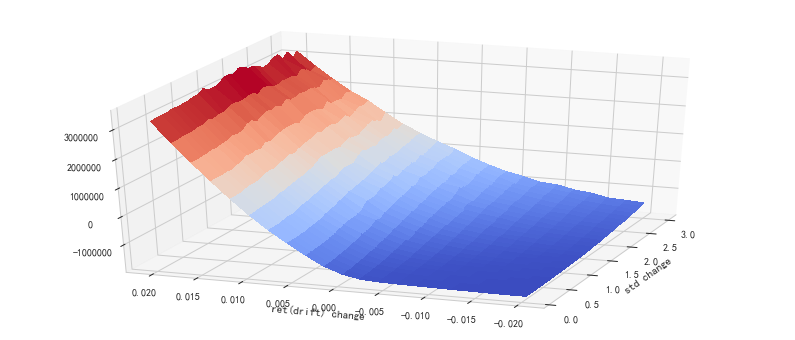

In [597]:
X = full_total_gain[0].unique().tolist()
Y = full_total_gain[2].unique().tolist()
X,Y = np.meshgrid(X, Y)
X = X.T
Y = Y.T
Z = []
for i in full_total_gain[0].unique().tolist():
    for j in full_total_gain[2].unique().tolist():
        Z.append(full_total_gain.set_index([0,1,2]).xs((i,0,j))[3])
Z = np.array(Z).reshape(len(full_total_gain[0].unique().tolist()),len(full_total_gain[2].unique().tolist()))
fig = plt.figure(figsize = (14,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('std change')
ax.set_ylabel('ret(drift) change')
ax.view_init(30, 200)
plt.show()

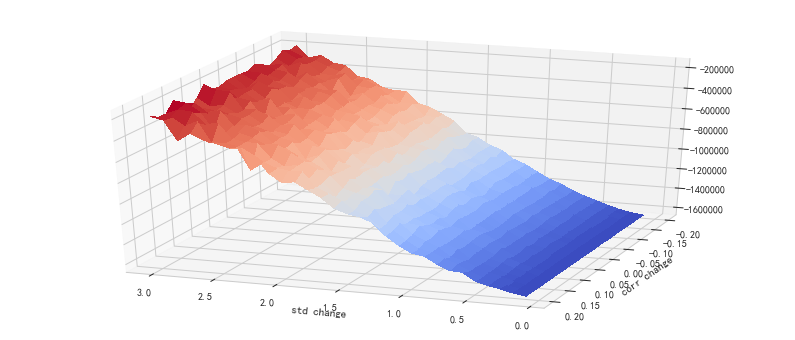

In [598]:
X = full_total_gain[0].unique().tolist()
Y = full_total_gain[1].unique().tolist()
X,Y = np.meshgrid(X, Y)
X = X.T
Y = Y.T
Z = []
for i in full_total_gain[0].unique().tolist():
    for j in full_total_gain[1].unique().tolist():
        Z.append(full_total_gain.set_index([0,1,2]).xs((i,j,0))[3])
Z = np.array(Z).reshape(len(full_total_gain[0].unique().tolist()),len(full_total_gain[1].unique().tolist()))
fig = plt.figure(figsize = (14,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('std change')
ax.set_ylabel('corr change')
ax.view_init(30, 110)
plt.show()

In [610]:
np.std([0.08,-0.08,0.08,-0.08,0.08,-0.08,0.08,-0.08,0.08,-0.08])*np.sqrt(252)

1.2699606293110035

In [602]:
implied_drift(0.4, 'call', 10, 10, .20, 0, 15/252, percent = False)

{'implied_r': 0.5637898046224858, 'know_price': 0.4, 'type_of_option': 'call'}

In [600]:
implied_volatility(0.4, 'call', 10, 10, 0, 0.0165, 15/252, percent = False)

{'implied_volatility': 0.40626755979490087,
 'know_price': 0.4,
 'type_of_option': 'call'}

In [604]:
European_option('call', 10, 10, .20, 0, 0.0165, 15/252, percent = False)

{'delta': 0.517757213382849,
 'gamma': 0.8167783421254989,
 'price': 0.1994967562504808,
 'rho': 0.0029631401057011956,
 'theta': -0.004700534049263111,
 'vega': 0.009723551691970226}

In [ ]:
spot_price = 10
strike_price = 10
volatility = 0.20
dividend_rate =  0
risk_free_rate = 0.0165
option_type = ql.Option.Call
day_count = ql.Business252()
calendar = ql.China()
calculation_date = ql.Date(9, 1, 2019)
maturity_date = ql.Date(30, 1, 2019)
ql.Settings.instance().evaluationDate = calculation_date
payoff = ql.PlainVanillaPayoff(option_type, strike_price)
settlement = calculation_date
am_exercise = ql.AmericanExercise(settlement, maturity_date)
american_option = ql.VanillaOption(payoff, am_exercise)
spot_handle = ql.QuoteHandle(ql.SimpleQuote(spot_price))
flat_ts = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, risk_free_rate, day_count))
dividend_yield = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, dividend_rate, day_count))
flat_vol_ts = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(calculation_date, calendar, volatility, day_count))
bsm_process = ql.BlackScholesMertonProcess(spot_handle, dividend_yield, flat_ts, flat_vol_ts)
steps = 200
binomial_engine = ql.BinomialVanillaEngine(bsm_process, "crr", steps)
american_option.setPricingEngine(binomial_engine)
print(american_option.NPV(),american_option.impliedVolatility(0.4,bsm_process))

In [ ]:
spot_price = 10
strike_price = 10
volatility = 0.20
dividend_rate =  0
risk_free_rate = 0.0165
option_type = ql.Option.Call
day_count = ql.Business252()
calendar = ql.China()
calculation_date = ql.Date(9, 1, 2019)
maturity_date = ql.Date(30, 1, 2019)
ql.Settings.instance().evaluationDate = calculation_date
payoff = ql.PlainVanillaPayoff(option_type, strike_price)
settlement = calculation_date
am_exercise = ql.AmericanExercise(settlement, maturity_date)
american_option = ql.VanillaOption(payoff, am_exercise)
spot_handle = ql.QuoteHandle(ql.SimpleQuote(spot_price))
flat_ts = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, risk_free_rate, day_count))
dividend_yield = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, dividend_rate, day_count))
flat_vol_ts = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(calculation_date, calendar, volatility, day_count))
bsm_process = ql.BlackScholesMertonProcess(spot_handle, dividend_yield, flat_ts, flat_vol_ts)